In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

In [2]:
df = pd.read_csv('allTogether.csv')

def myround(x, base=1, dec=1):
    return round(base * round(x/base),dec)

# groupNames, majLabel and colors are synonyms
df = df.drop(['question.groupNames','question.colors'], axis=1)

# add gender-focused version of the cv score (demographic parity)
# S=1 for male personas, S=0 for female personas
df['question.gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='female', 'question.gender_cv'] = 2-df['question.cv']
# S=0 for female personas, S=1 for male personas
df['question.inverse_gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='male', 'question.inverse_gender_cv'] = 2-df['question.cv']

# categorial gender-based cv
df['question.cat_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='female', 'question.cat_gender_cv'] = myround(2-df['question.cv'], .2)
# categorial inversed gender-based cv
df['question.cat_inverse_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='male', 'question.cat_inverse_gender_cv'] = myround(2-df['question.cv'], .2)

# categorial majority-based cv
df['question.cat_cv'] = myround(df['question.cv'], .2)

# categorial inversed majority-based cv
df['question.cat_inverse_cv'] = myround(2-df['question.cv'], .2)

pd.set_option('display.max_columns', None)
df.head()

,_id,rating,inconfidence,secondsElapsed,question.questionType,question.number,question.minSize,question.majSize,question.majLabel,question.tpr,question.tnr,question.bcr,question.accuracy,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.tpr0,question.tnr0,question.bcr0,question.accuracy0,question.adj_tpr0,question.adj_tnr0,question.adj_bcr0,question.adj_accuracy0,question.tpr1,question.tnr1,question.bcr1,question.accuracy1,question.adj_tpr1,question.adj_tnr1,question.adj_bcr1,question.adj_accuracy1,question.s_tpr,question.s_tnr,question.s_bcr,question.s_accuracy,question.s_adj_tpr,question.s_adj_tnr,question.s_adj_bcr,question.s_adj_accuracy,question.cv,question.cluster,question.ordering_utility,question.sum_of_diff,question.rND,question.new_rND,user._id,user.language,user.accuracy,user.age,user.believe,user.comparativeAccuracy,user.confidence,user.edu,user.fear,user.gender,user.genderParity,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,question.gender_cv,question.inverse_gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_cv,question.cat_inverse_cv
0,ObjectId(5f3500c84f6d2fc080cfe347),0.89,0.84,36.534,selection,719,3,7,female,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.00,1.000000,NaN,NaN,1.000000,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.714286,3,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.285714,1.714286,0.2,1.8,1.8,0.2
1,ObjectId(5f3500d94f6d2fc080cfe34d),0.58,NaN,16.849,selection,944,5,5,female,0.833333,0.750000,0.791667,0.8,0.927083,0.833333,0.880208,0.898551,0.666667,1.000000,0.833333,0.80,0.854167,1.000000,0.927083,0.898551,1.0,0.5,0.75,0.800000,1.000000,0.666667,0.833333,0.898551,0.666667,1.500000,1.083333,1.000000,0.854167,1.333333,1.093750,1.000000,0.600000,8,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.400000,0.600000,1.4,0.6,0.6,1.4
2,ObjectId(5f3500e64f6d2fc080cfe351),0.39,0.06,12.849,selection,282,4,6,male,0.666667,0.857143,0.761905,0.8,0.774194,0.885246,0.829720,0.862745,1.000000,0.666667,0.833333,0.75,1.000000,0.791045,0.895522,0.827160,0.5,1.0,0.75,0.833333,0.730769,1.000000,0.865385,0.921348,1.500000,0.666667,1.083333,0.916667,1.269231,0.791045,1.030138,0.905812,1.333333,7,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.333333,0.666667,1.4,0.6,1.4,0.6
3,ObjectId(5f3500f14f6d2fc080cfe355),0.25,NaN,10.424,selection,556,4,6,female,0.500000,0.666667,0.583333,0.6,0.565217,0.813725,0.689471,0.736486,0.333333,1.000000,0.666667,0.50,0.395349,1.000000,0.697674,0.500000,1.0,0.6,0.80,0.666667,1.000000,0.747967,0.873984,0.770370,0.333333,1.400000,0.866667,0.833333,0.395349,1.252033,0.823691,0.729630,0.750000,2,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.250000,0.750000,1.2,0.8,0.8,1.2
4,ObjectId(5f3500f94f6d2fc080cfe359),0.05,0.13,8.199,selection,52,1,9,female,0.000000,0.888889,0.444444,0.8,0.000000,0.857143,0.428571,0.825911,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0.000000,0.0,1.0,0.50,0.888889,0.000000,1.000000,0.500000,0.957746,NaN,0.000000,NaN,0.111111,NaN,0.000000,NaN,0.042254,2.000000,0,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.000000,2.000000,0.0,2.0,2.0,0.0


In [3]:
cat_cols = [
    'question.majLabel',
    'question.questionType',
    'user.language',
    'user.age',
    'user.edu',
    'user.gender',
    'question.cluster',
]
num_cols = [
    'secondsElapsed',
    'question.minSize',
    'question.majSize',
    'user.believe',
    'user.confidence',
    'user.fear',
    'user.political',
    'user.religious',
    'user.screenHeight',
    'user.screenWidth',
    'user.will',
    'user.agreeableness',
    'user.conscientiousness',
    'user.extraversion',
    'user.neuroticism',
    'user.openness',
    'user.accuracy',
    'user.comparativeAccuracy',
    'user.genderParity',
    'inconfidence',
]
num_cols_sel = [
    'question.adj_tpr',
    'question.adj_tnr',
    'question.adj_bcr',
    'question.adj_accuracy',
    'question.cv',
    'question.gender_cv',
    'question.inverse_gender_cv',
    'question.cat_gender_cv',
    'question.cat_cv',
    'question.cat_inverse_gender_cv',
    'question.cat_inverse_cv',
]

# split dataset according to questionType
df_sel = df.query("`question.questionType` == 'selection'")[['rating'] + num_cols + num_cols_sel + cat_cols]
df_sel.head()

,rating,secondsElapsed,question.minSize,question.majSize,user.believe,user.confidence,user.fear,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,user.accuracy,user.comparativeAccuracy,user.genderParity,inconfidence,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.cv,question.gender_cv,question.inverse_gender_cv,question.cat_gender_cv,question.cat_cv,question.cat_inverse_gender_cv,question.cat_inverse_cv,question.majLabel,question.questionType,user.language,user.age,user.edu,user.gender,question.cluster
0,0.89,36.534,3,7,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.84,1.000000,1.000000,1.000000,1.000000,1.714286,0.285714,1.714286,0.2,1.8,1.8,0.2,female,selection,de,25,abitur,male,3
1,0.58,16.849,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.927083,0.833333,0.880208,0.898551,0.600000,1.400000,0.600000,1.4,0.6,0.6,1.4,female,selection,de,25,abitur,male,8
2,0.39,12.849,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.06,0.774194,0.885246,0.829720,0.862745,1.333333,1.333333,0.666667,1.4,1.4,0.6,0.6,male,selection,de,25,abitur,male,7
3,0.25,10.424,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.565217,0.813725,0.689471,0.736486,0.750000,1.250000,0.750000,1.2,0.8,0.8,1.2,female,selection,de,25,abitur,male,2
4,0.05,8.199,1,9,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.13,0.000000,0.857143,0.428571,0.825911,2.000000,0.000000,2.000000,0.0,2.0,2.0,0.0,female,selection,de,25,abitur,male,0


# Majority size ignoring the actual decision

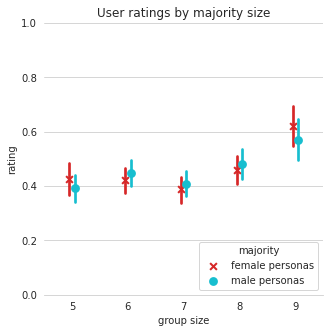

In [4]:
sns.set_style("whitegrid")

df_male = df_sel[df_sel['question.majLabel'] == 'male'].copy()
df_male['group size'] = df['question.majSize']
df_male['group'] = 'male personas'
df_female = df_sel[df_sel['question.majLabel'] == 'female'].copy()
df_female['group size'] = df['question.majSize']
df_female['group'] = 'female personas'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, hue='group', dodge=.1, ci=90,
                  x='group size', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'])
ax.set(xlim=(-0.5, 4.5), ylim=(0,1))
ax.legend(loc=4, title='majority')
g.set_title('User ratings by majority size')
sns.despine(left=True)

In [5]:
df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_male[df_male['group size'] == i].rating,
                             df_female[df_female['group size'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

,T,p-val
group size,,
5.0,-0.711773,0.477261
6.0,0.651993,0.514853
7.0,0.465961,0.641553
8.0,0.458579,0.646935
9.0,-0.747798,0.455753


In [6]:
pg.ttest(pd.concat([df_male[df_male['group size'] == 5], df_female[df_female['group size'] == 5]]).rating,
         pd.concat([df_male[df_male['group size'] == 9], df_female[df_female['group size'] == 9]]).rating)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.696731,300.623284,two-sided,0.000004,"[-0.27, -0.11]",0.482342,3775.541,0.997356


Generally, scenarios with a heavily skewed applicant population get rated better than those with an population
that more closely resembles society (significant).
Also, scenarios in which there are 9 times more female personas than male personas get rated better than vice versa
(not significant).

# Majority size and majority-minority parity

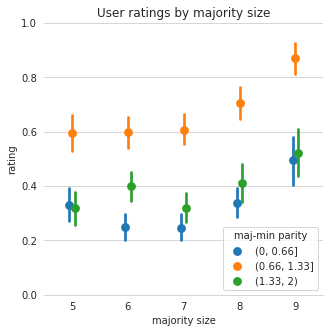

In [7]:
df_0 = df_sel[df_sel['question.cv'] < 0.666].copy()
df_0['cv'] = '(0, 0.66]'
df_1 = df_sel[(df_sel['question.cv'] >= 0.666) & (df_sel['question.cv'] < 1.333)].copy()
df_1['cv'] = '(0.66, 1.33]'
df_2 = df_sel[df_sel['question.cv'] >= 1.333].copy()
df_2['cv'] = '(1.33, 2)'

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_0, df_1, df_2]), ax=ax, hue='cv', dodge=.1, ci=90,
                  x='question.majSize', y='rating', join=False)
ax.set(xlim=(-0.5, 4.5), ylim=(0,1))
g.set_title('User ratings by majority size')
g.set(xlabel = 'majority size')
ax.legend(loc=4, title='maj-min parity')
sns.despine(left=True)

In [8]:
df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_1[df_1['question.majSize'] == i].rating,
                             df_2[df_2['question.majSize'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

,T,p-val
group size,,
5.0,4.887263,2.417108e-06
6.0,4.225428,3.401954e-05
7.0,6.148355,3.553691e-09
8.0,5.301718,3.972883e-07
9.0,5.439570,4.376306e-07


In [9]:
df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_0[df_0['question.majSize'] == i].rating,
                             df_2[df_2['question.majSize'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

,T,p-val
group size,,
5.0,0.216842,0.828580
6.0,-3.339049,0.000999
7.0,-1.699060,0.090761
8.0,-1.385931,0.167778
9.0,-0.325216,0.745614


Across all majority sizes, scenarios with selections that either benefit minority or majority
(parity < 0.66 or parity >= 1.33) get rated worse than selections according to majority-minority distribution
in the applicant population (significant).

Only for medium majority sizes (6 and 7), it is considered better to benefit the minority unproportional to their representation (significant).

# Group size and gender parity

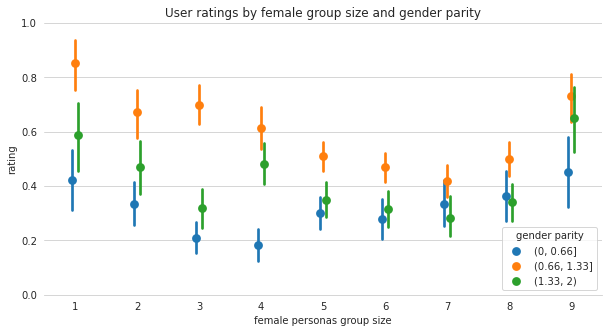

In [10]:
df_sel['female size'] = df_sel['question.minSize']
df_sel.loc[df_sel['question.majLabel'] == 'female', 'female size'] = df_sel['question.majSize']
df_0 = df_sel[df_sel['question.gender_cv'] < 0.666].copy()
df_0['cv'] = '(0, 0.66]'
df_1 = df_sel[(df_sel['question.gender_cv'] >= 0.666) & (df_sel['question.cv'] < 1.333)].copy()
df_1['cv'] = '(0.66, 1.33]'
df_2 = df_sel[df_sel['question.gender_cv'] >= 1.333].copy()
df_2['cv'] = '(1.33, 2)'
data = pd.concat([df_0, df_1, df_2]).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,5))
g = sns.pointplot(data=data, ax=ax, hue='cv', dodge=.1, ci=90,
                  x='female size', y='rating', join=False)
ax.set(xlim=(-0.5, 8.5), ylim=(0,1))
g.set_title('User ratings by female group size and gender parity')
g.set(xlabel = 'female personas group size')
ax.legend(loc=4, title='gender parity')
sns.despine(left=True)

In [11]:
df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_1[df_1['female size'] == i].rating,
                             df_2[df_2['female size'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

,T,p-val
group size,,
1.0,2.781681,7.998643e-03
2.0,2.458180,1.652150e-02
3.0,6.157690,1.092209e-08
4.0,1.902997,5.951574e-02
5.0,3.203185,1.580249e-03
6.0,2.927230,4.010501e-03
7.0,2.402988,1.782830e-02
8.0,2.812575,5.632526e-03
9.0,0.878181,3.838151e-01


In [12]:
df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_0[df_0['female size'] == i].rating,
                             df_2[df_2['female size'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

,T,p-val
group size,,
1.0,-1.572088,0.121305
2.0,-1.746061,0.085230
3.0,-1.939908,0.054900
4.0,-4.880150,0.000004
5.0,-0.887403,0.376012
6.0,-0.609090,0.543856
7.0,0.725002,0.470355
8.0,0.311697,0.756051
9.0,-1.811384,0.076281


For female majorities (female group size > 5), users rate selections with even and uneven gender parity more similar than for female minorities (still significant, except for female group size = 9).

Only for medium female minorities (female group size in {2, 3, 4}) and a strong female majority (female group size = 9), users significantly rate selections that benefit female personas better than selections that benefit male personas.

The minimal rating for selections that benefit male personas is found at a slight female minority (female group size = 4). In contrast, the minimal rating for selections that benefit female personas as well as for selections with even gender parity is found at a medium female minority (female group size = 7).

**-> no particular protection for very small groups?!**

# Group size by participant gender

### Selections that benefit female personas

,T,p-val
group size,,
1.0,-0.917757,0.367100
2.0,0.027113,0.978551
3.0,-0.799186,0.428320
4.0,-1.339947,0.186089
5.0,-0.651143,0.516741
6.0,-1.907391,0.062161
7.0,-0.747178,0.458759
8.0,0.066659,0.947124
9.0,0.316581,0.754090


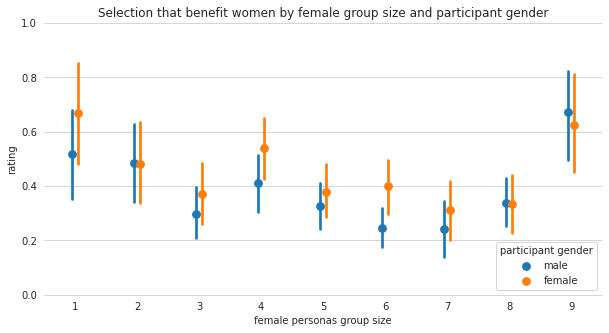

In [13]:
df_male = df_sel[(df_sel['user.gender'] == 'male') & (df_sel['question.gender_cv'] >= 1.33)].copy()
df_male['participant gender'] = 'male'
df_female = df_sel[(df_sel['user.gender'] == 'female') & (df_sel['question.gender_cv'] >= 1.33)].copy()
df_female['participant gender'] = 'female'
data = pd.concat([df_male, df_female]).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,5))
g = sns.pointplot(data=data, ax=ax, hue='participant gender', dodge=.1, ci=90,
                  x='female size', y='rating', join=False)
ax.set(xlim=(-0.5, 8.5), ylim=(0,1))
g.set_title('Selection that benefit women by female group size and participant gender')
g.set(xlabel = 'female personas group size')
ax.legend(loc=4, title='participant gender')
sns.despine(left=True)

df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_male[df_male['female size'] == i].rating,
                             df_female[df_female['female size'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

Female participants give a bonus to selections that benefit women over male participants, when the female group size is very small (female group size = 1) as well as for selections in scenarios with slightly more women / men (female group size in {4, 6}). Hence female users protect very small female groups. All this is however insignificant.

### Selection that benefit male personas

,T,p-val
group size,,
1.0,0.071542,0.943466
2.0,0.897723,0.375158
3.0,0.564439,0.574741
4.0,-0.016641,0.986802
5.0,-0.029626,0.976433
6.0,-0.270464,0.788246
7.0,0.004453,0.996471
8.0,-0.887293,0.381968
9.0,-0.185112,0.855347


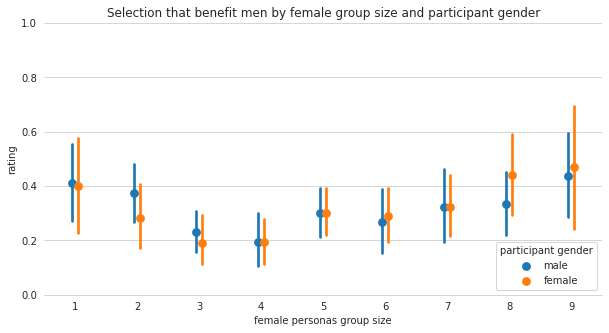

In [14]:
df_male = df_sel[(df_sel['user.gender'] == 'male') & (df_sel['question.gender_cv'] < 0.66)].copy()
df_male['participant gender'] = 'male'
df_female = df_sel[(df_sel['user.gender'] == 'female') & (df_sel['question.gender_cv'] < 0.66)].copy()
df_female['participant gender'] = 'female'
data = pd.concat([df_male, df_female]).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,5))
g = sns.pointplot(data=data, ax=ax, hue='participant gender', dodge=.1, ci=90,
                  x='female size', y='rating', join=False)
ax.set(xlim=(-0.5, 8.5), ylim=(0,1))
g.set_title('Selection that benefit men by female group size and participant gender')
g.set(xlabel = 'female personas group size')
ax.legend(loc=4, title='participant gender')
sns.despine(left=True)

df_results = pd.DataFrame(columns=['group size','T','p-val'])
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    results_ttest = pg.ttest(df_male[df_male['female size'] == i].rating,
                             df_female[df_female['female size'] == i].rating)
    new_row = {'group size': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('group size')

For selections that benefit male personas, there is no differences between the ratings of female and male participants across all female group sizes. Hence small male groups do not get particularily protected.

Female participants rate however selections that benefit male personas worse than man for small female group sizes (in {2, 3}), another indication that women protect small female groups (not significant).